In [ ]:
# 請將所有手寫辨識 28 * 28 --> 56 * 56
# with    anti-aliasing
# without anti-aliasing

In [ ]:
# 導入函式庫
import numpy as np  
import keras
# from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.utils import np_utils  # 用來後續將 label 標籤轉為 one-hot-encoding  
from matplotlib import pyplot as plt
import os
from datetime import datetime

start=datetime.now()

# 載入 MNIST 資料庫的訓練資料，並自動分為『訓練組』及『測試組』
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 建立簡單的線性執行的模型
model = keras.models.Sequential()
# Add Input layer, 隱藏層(hidden layer) 有 256個輸出變數
model.add(Dense(units=128, input_dim=112*112, kernel_initializer='normal', activation='relu')) 
# Add output layer
model.add(Dense(units=10, kernel_initializer='normal', activation='softmax'))

# 編譯: 選擇損失函數、優化方法及成效衡量方式
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 128)               1605760   
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 1,607,050
Trainable params: 1,607,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
%%time
# 可以試試這樣做 僅是部分資料
from tqdm import tqdm # 跑出步近圖
import numpy as np
from skimage.filters import gaussian
from skimage.filters import sobel
from skimage import exposure
from skimage.transform import rescale

downscale = (4)
X_train_skimage = np.array([rescale(x, downscale, anti_aliasing=False, multichannel=False) for x in X_train[:]]) # <--核心價值 change me
X_test_skimage = np.array([rescale(x, downscale, anti_aliasing=False, multichannel=False) for x in X_test[:]])  # <--核心價值 change me
print('Preprocessed by skimage.rescale')

Preprocessed by skimage.rescale
Wall time: 4min 39s


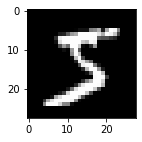

In [ ]:
# 劃出一 原來圖片
plt.figure(figsize=(2,2))
plt.imshow(X_train[0], cmap='gray')
plt.axis('on')
plt.show()

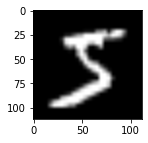

Data range after preprocessed 0.0 0.9921568627450981


In [ ]:
# 劃出一圖片
plt.figure(figsize=(2,2))
plt.imshow(X_train_skimage[0], cmap='gray')
plt.axis('on')
plt.show()
print('Data range after preprocessed', X_train_skimage[0].min(), X_train_skimage[0].max())

In [ ]:
# 將 training 的 label 進行 one-hot encoding，例如數字 7 經過 One-hot encoding 轉換後是 0000001000，即第7個值為 1
y_TrainOneHot = np_utils.to_categorical(y_train) 
y_TestOneHot = np_utils.to_categorical(y_test) 

# 將 training 的 input 資料轉為2維
X_train = X_train_skimage #<--------------preprocessed by skimage
X_test  = X_test_skimage  #<--------------preprocessed by skimage

X_train_2D = X_train.reshape(60000, 112*112).astype('float32')  #< -----
X_test_2D = X_test.reshape(10000, 112*112).astype('float32')    #< -----

x_Train_norm = X_train_2D # /255.0  #<-------取消
x_Test_norm = X_test_2D   # /255.0  #<-------取消

# 進行訓練, 訓練過程會存在 train_history 變數中
train_history = model.fit(x=x_Train_norm, y=y_TrainOneHot, 
                          validation_split=0.2, epochs=10, 
                          batch_size=800, verbose=2)  

InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run _EagerConst: Dst tensor is not initialized.

In [ ]:
# 顯示訓練成果(分數)
scores = model.evaluate(x_Test_norm, y_TestOneHot)  
print()  
print("\t[Info] Accuracy of testing data = {:2.1f}%".format(scores[1]*100.0))  
